1. Multi-variable Analysis

Explore how multiple variables interact together.

🔹 Examples:
Does gender + test prep affect performance more than just one?

In [1]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")

In [2]:
# Check shape, missing values, and data types

print("Data Frame Shape:",df.shape)
print("Mising Value:-\n",df.isnull().sum())


Data Frame Shape: (1000, 8)
Mising Value:-
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [3]:
# Does gender + test prep affect performance more than just one?

df.groupby(['gender','test preparation course'])[["math score",'reading score']].mean()

math score  reading score
gender test preparation course                           
female completed                 67.195652      77.375000
       none                      61.670659      69.982036
male   completed                 72.339080      70.212644
       none                      66.688312      62.795455

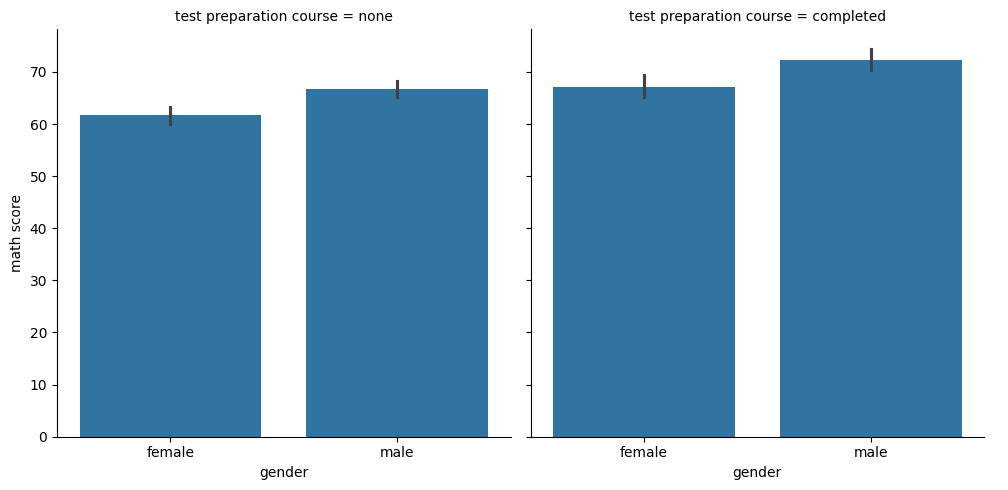

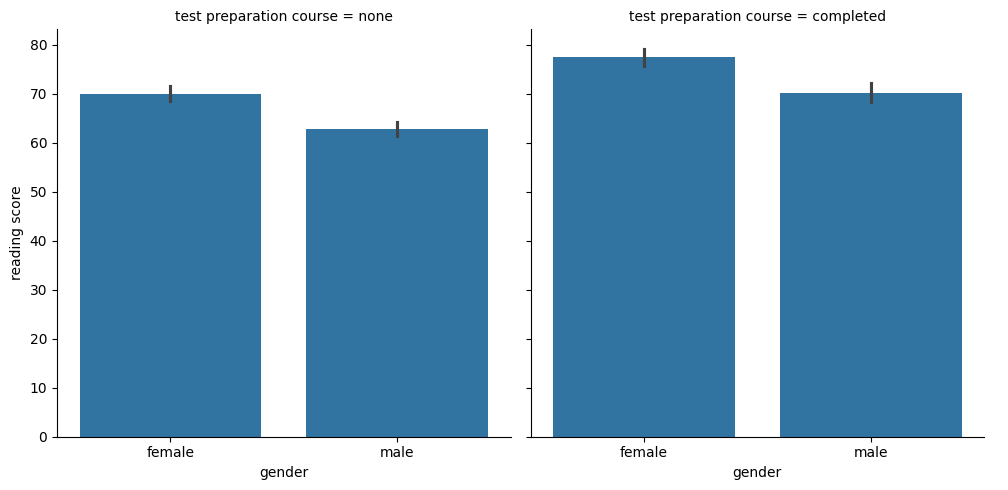

In [4]:
import seaborn as sns

sns.catplot(data=df, x='gender', y='math score', col='test preparation course', kind='bar')
sns.catplot(data=df, x='gender', y='reading score', col='test preparation course', kind='bar')

In [5]:
grouped = df.groupby(['gender','parental level of education'])[["math score",'reading score','writing score']].mean()

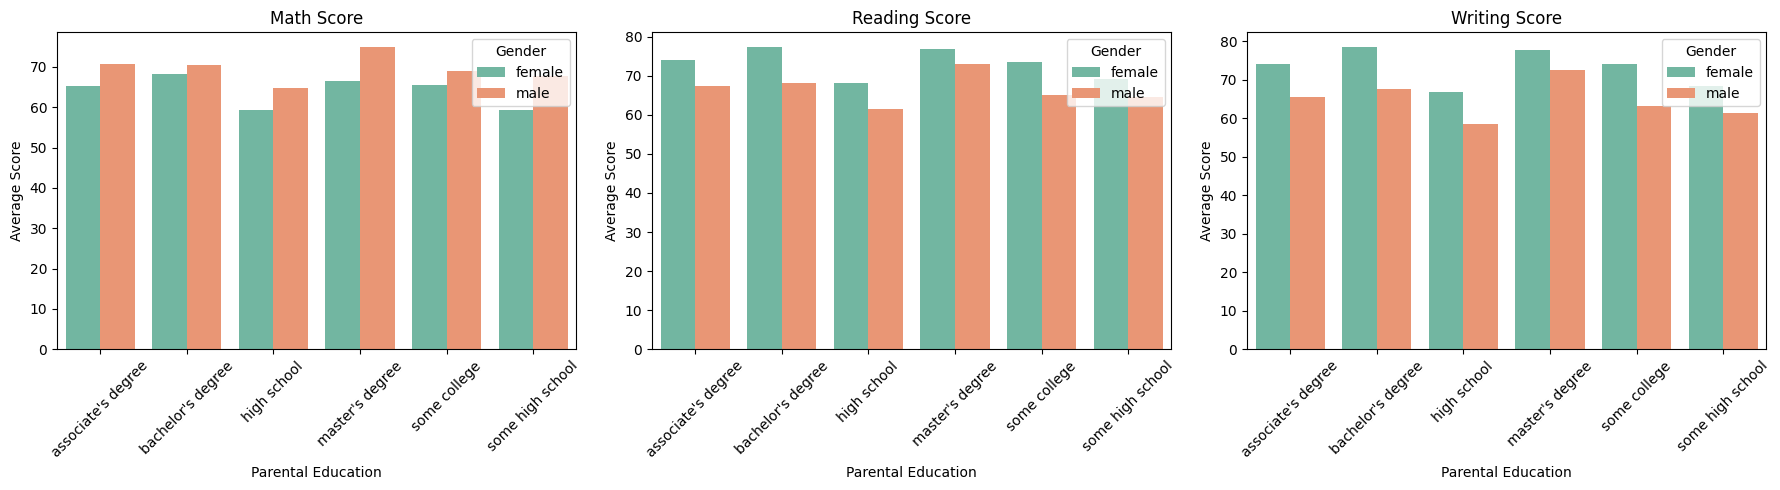

In [6]:
# Reset index to turn multi-index into columns
grouped = grouped.reset_index()

# Melt the DataFrame to long format
df_melted = grouped.melt(id_vars=['gender', 'parental level of education'],
                         value_vars=['math score', 'reading score', 'writing score'],
                         var_name='subject',
                         value_name='average score')

import seaborn as sns
import matplotlib.pyplot as plt

subjects = ['math score', 'reading score', 'writing score']
titles = ['Math Score', 'Reading Score', 'Writing Score']

plt.figure(figsize=(18, 5))  # 3 subplots in one row

for i, subject in enumerate(subjects):
    plt.subplot(1, 3, i + 1)
    sns.barplot(data=grouped,
                x='parental level of education',
                y=subject,
                hue='gender',
                palette='Set2')
    
    plt.title(titles[i])
    plt.xticks(rotation=45)
    plt.ylabel('Average Score')
    plt.xlabel('Parental Education')
    plt.legend(title='Gender')

plt.tight_layout()
plt.show()



In [7]:
from scipy.stats import skew, kurtosis
print(skew(df['math score']))
print(kurtosis(df['math score']))


-0.278516571914075
0.26759715461497846


In [8]:
from sklearn.cluster import KMeans

X = df[['math score', 'reading score', 'writing score']]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)
sns.scatterplot(data=df, x='math score', y='reading score', hue='cluster')


ModuleNotFoundError: No module named 'sklearn'